# 0. Install and Import dependencies

In [12]:
# !pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

In [13]:
# Gym stuff
import gymnasium as gym
import gym_anytrading

# Stable baselines - rl stuff
# from stable_baselines.common.vec_env import DummyVecEnv
# from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [14]:
df = pd.read_csv('./UPS_1Y_Stock.csv')

In [15]:
df.head()

,Date,Open,High,Low,Close,Volume
0,11/29/2023,151.52,153.46,151.45,152.29,"2,981,656"
1,11/28/2023,149.70,151.08,148.98,150.74,"3,074,002"
2,11/27/2023,151.04,151.44,149.57,149.59,"3,320,030"
3,11/24/2023,151.17,152.04,150.75,152.03,"1,644,358"
4,11/22/2023,150.96,151.24,149.94,150.75,"2,640,250"


In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [17]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-11-29,151.52,153.46,151.45,152.29,"2,981,656"
2023-11-28,149.70,151.08,148.98,150.74,"3,074,002"
2023-11-27,151.04,151.44,149.57,149.59,"3,320,030"
2023-11-24,151.17,152.04,150.75,152.03,"1,644,358"
2023-11-22,150.96,151.24,149.94,150.75,"2,640,250"


In [18]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,len(df)), window_size=5)

In [19]:
env.signal_features

/usr/local/anaconda3/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.signal_features to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.signal_features` for environment variables or `env.get_wrapper_attr('signal_features')` that will search the reminding wrappers.
  logger.warn(


array([[ 1.5229e+02,  0.0000e+00],
       [ 1.5074e+02, -1.5500e+00],
       [ 1.4959e+02, -1.1500e+00],
       [ 1.5203e+02,  2.4400e+00],
       [ 1.5075e+02, -1.2800e+00],
       [ 1.4977e+02, -9.8000e-01],
       [ 1.4957e+02, -2.0000e-01],
       [ 1.4798e+02, -1.5900e+00],
       [ 1.4691e+02, -1.0700e+00],
       [ 1.4717e+02,  2.6000e-01],
       [ 1.4317e+02, -4.0000e+00],
       [ 1.3817e+02, -5.0000e+00],
       [ 1.3811e+02, -6.0000e-02],
       [ 1.3995e+02,  1.8400e+00],
       [ 1.4195e+02,  2.0000e+00],
       [ 1.4185e+02, -1.0000e-01],
       [ 1.4227e+02,  4.2000e-01],
       [ 1.4286e+02,  5.9000e-01],
       [ 1.4199e+02, -8.7000e-01],
       [ 1.3980e+02, -2.1900e+00],
       [ 1.4125e+02,  1.4500e+00],
       [ 1.3878e+02, -2.4700e+00],
       [ 1.3483e+02, -3.9500e+00],
       [ 1.3821e+02,  3.3800e+00],
       [ 1.4693e+02,  8.7200e+00],
       [ 1.4932e+02,  2.3900e+00],
       [ 1.4816e+02, -1.1600e+00],
       [ 1.5196e+02,  3.8000e+00],
       [ 1.5206e+02,

In [20]:
env.action_space

Discrete(2)

/usr/local/anaconda3/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


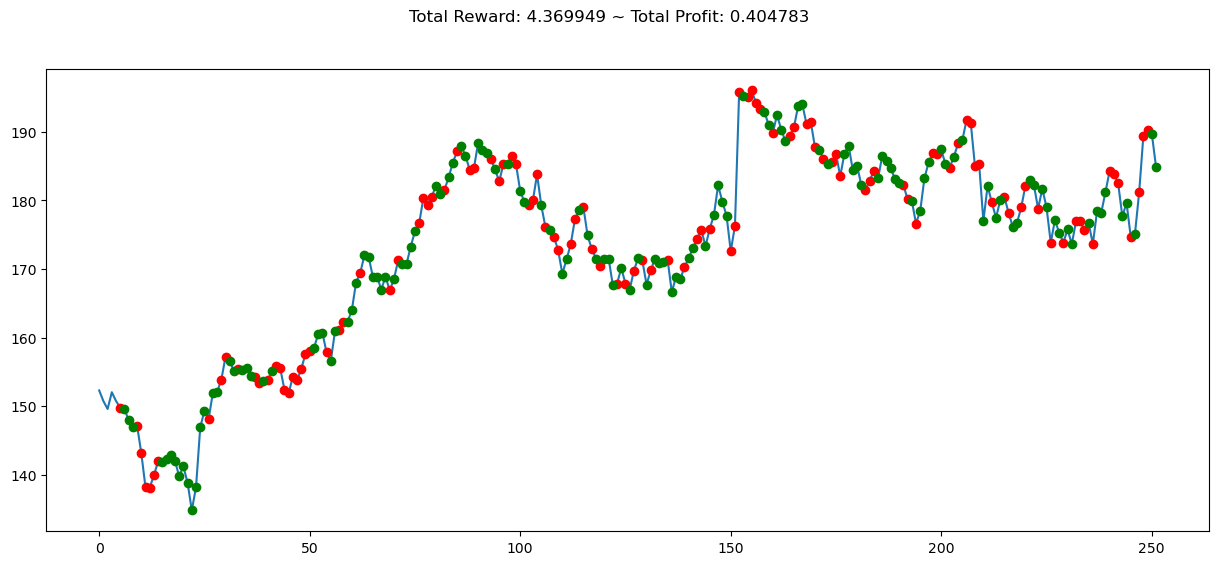

In [21]:
state = env.reset()
for _ in range(len(df)-6): # i have no clue why -6
    action = env.action_space.sample()
    #https://stackoverflow.com/questions/73195438/openai-gyms-env-step-what-are-the-values
    obs, reward, terminated, truncated , info = env.step(action)
    if terminated:
        print("terminated")
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [22]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

NameError: name 'DummyVecEnv' is not defined

In [ ]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

# 4. Evaluation

In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()